In [1]:
import matplotlib.pyplot as plt
from osgeo import gdal
import numpy as np
import seaborn as sns

# Test on ECMW, GDAS, GlobSnow SWE data, clipped to CLPX in GEE. Exported. 
filepath4 = r"C:\Users\vicki\gee-swe-plots\LAI_Quebec_5km_test2.tif"
filepath5 = r"C:\Users\vicki\gee-swe-plots\Hansen_Quebec_5km_test2.tif"

# Open the file:
raster4 = gdal.Open(filepath4)
raster5 = gdal.Open(filepath5)


In [2]:
# Read raster data as numeric array from GDAL Dataset
rasterArray4 = raster4.ReadAsArray()
rasterArray5 = raster5.ReadAsArray()

# use flatten to take a 2-D array and turn it into a 1-D array
flattened_raster_data4 = rasterArray4.flatten()
flattened_raster_data5 = rasterArray5.flatten()

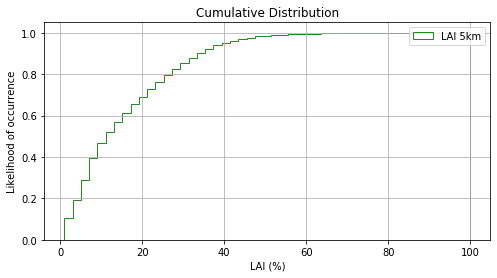

In [4]:
# make a figure
fig, ax = plt.subplots(figsize=(8, 4))

# plot the cumulative histogram
ax.hist(flattened_raster_data4, bins=np.linspace(1, 100, 50),density=True, cumulative=True, label='LAI 5km',
         histtype=u'step', color='forestgreen')

ax.grid(True)
ax.legend(loc='upper right')
ax.set_title('Cumulative Distribution')
ax.set_xlabel('LAI (%)')
ax.set_ylabel('Likelihood of occurrence')

plt.show()

C:\Users\vicki\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location 'top_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':


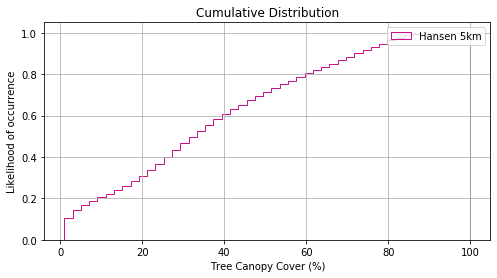

In [5]:
# make a figure
fig, ax = plt.subplots(figsize=(8, 4))

# plot the cumulative histogram
ax.hist(flattened_raster_data5, density=True, bins=np.linspace(1, 100, 50), cumulative=True, label='Hansen 5km',
         histtype='step', color='mediumvioletred')

ax.grid(True)
ax.legend(loc='top_right')
ax.set_title('Cumulative Distribution')
ax.set_xlabel('Tree Canopy Cover (%)')
ax.set_ylabel('Likelihood of occurrence')

plt.show()

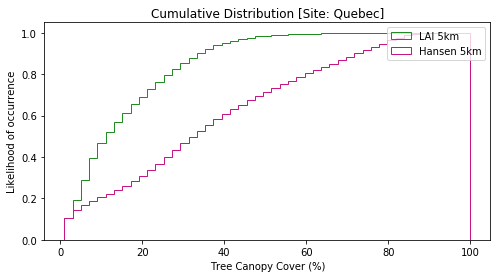

In [6]:
# make a figure
fig, ax = plt.subplots(figsize=(8, 4))

# plot the cumulative histogram
ax.hist(flattened_raster_data4, density=True, bins=np.linspace(1, 100, 50), cumulative=True, label='LAI 5km',
         histtype='step', color='forestgreen')

# plot the cumulative histogram
ax.hist(flattened_raster_data5, density=True, bins=np.linspace(1, 100, 50), cumulative=True, label='Hansen 5km',
         histtype='step', color='mediumvioletred')


ax.grid(False)
ax.legend(loc='upper right')
ax.set_title('Cumulative Distribution [Site: Quebec]')
ax.set_xlabel('Tree Canopy Cover (%)')
ax.set_ylabel('Likelihood of occurrence')

plt.show()

Text(0, 0.5, 'Cumulative Fraction of Area')

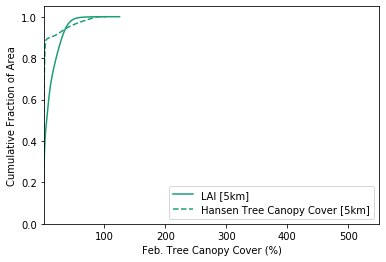

In [7]:
# Smooth out the lines
fig = sns.kdeplot(flattened_raster_data4, cumulative=True, bw=1.5, label='LAI [5km]', color='#1b9e77')
fig = sns.kdeplot(flattened_raster_data5, cumulative=True, bw=1.5, label='Hansen Tree Canopy Cover [5km]', color='#1b9e77', linestyle= '--')

# fig.figure.suptitle("Plot", fontsize = 24)
plt.legend(loc='lower right')
plt.xlim(1,550)
plt.xlabel('Feb. Tree Canopy Cover (%)')
plt.ylabel('Cumulative Fraction of Area')


In [8]:
import numpy as np

x = flattened_raster_data4[~np.isnan(flattened_raster_data4)]
x2 = flattened_raster_data5[~np.isnan(flattened_raster_data5)]

# code to replace all negative value with 0 
# flattened_raster_data4[flattened_raster_data4 < 0] = 0
  
# printing result 
print("New resulting array: ", x)

New resulting array:  [ 0.          0.          0.         ... 22.27272727 27.27272727
 21.54545455]


Text(0, 0.5, 'Cumulative Fraction of Area')

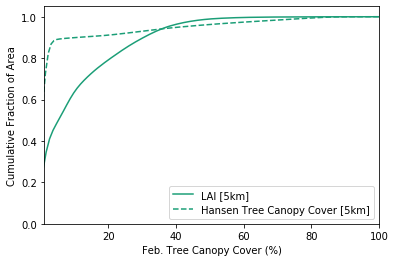

In [13]:
# Smooth out the lines
fig = sns.kdeplot(x, cumulative=True, bw=1.5, label='LAI [5km]', color='#1b9e77')
fig = sns.kdeplot(x2, cumulative=True, bw=1.5, label='Hansen Tree Canopy Cover [5km]', color='#1b9e77', linestyle= '--')

# fig.figure.suptitle("Plot", fontsize = 24)
plt.legend(loc='lower right')
plt.xlim(1,100)
plt.xlabel('Feb. Tree Canopy Cover (%)')
plt.ylabel('Cumulative Fraction of Area')

Text(0, 0.5, 'Feb. Tree Canopy Cover (%)')

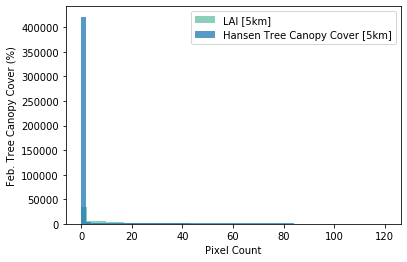

In [10]:
plt.hist(x, bins=50, label='LAI [5km]', color='#1b9e77', alpha=0.5)
plt.hist(x2, bins=50, label='Hansen Tree Canopy Cover [5km]', color='#1f78b4',  alpha=0.75)
plt.legend(loc='upper right')
# plt.xlim(xmin=1, xmax = 100)
# plt.ylim(ymin=1, ymax = 1000)

plt.xlabel('Pixel Count')
plt.ylabel('Feb. Tree Canopy Cover (%)')

Text(0.5, 0, 'Feb. Tree Canopy Cover (%)')

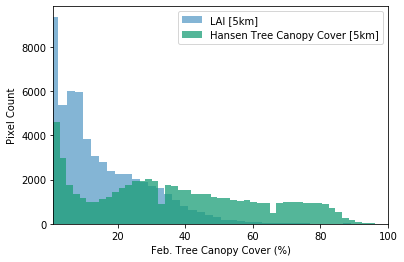

In [11]:
# damn, hella 0s. Let's just leave those out..and see what that looks like
t1 = x[x>0]
t2 = x2[x2>0]

plt.hist(t1, bins=50, label='LAI [5km]', color='#1f78b4', alpha=0.55)
plt.hist(t2, bins=50, label='Hansen Tree Canopy Cover [5km]', color='#1b9e77',  alpha=0.75)
plt.legend(loc='upper right')
plt.xlim(xmin=1, xmax = 100)
# plt.ylim(ymin=1, ymax = 1000)

plt.ylabel('Pixel Count')
plt.xlabel('Feb. Tree Canopy Cover (%)')

Text(0, 0.5, 'Cumulative Fraction of Area')

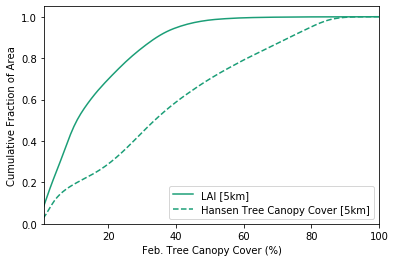

In [12]:
# let's do this again then, without 0s 
fig = sns.kdeplot(t1, cumulative=True, bw=1.5, label='LAI [5km]', color='#1b9e77')
fig = sns.kdeplot(t2, cumulative=True, bw=1.5, label='Hansen Tree Canopy Cover [5km]', color='#1b9e77', linestyle= '--')

# fig.figure.suptitle("Plot", fontsize = 24)
plt.legend(loc='lower right')
plt.xlim(1,100)
plt.xlabel('Feb. Tree Canopy Cover (%)')
plt.ylabel('Cumulative Fraction of Area')

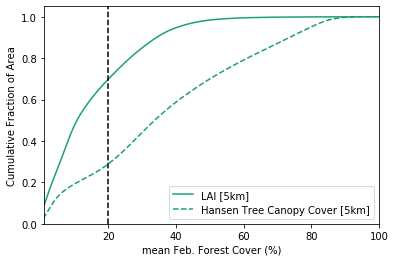

In [17]:
# let's do this again then, without 0s 
fig = sns.kdeplot(t1, cumulative=True, bw=1.5, label='LAI [5km]', color='#1b9e77')
fig = sns.kdeplot(t2, cumulative=True, bw=1.5, label='Hansen Tree Canopy Cover [5km]', color='#1b9e77', linestyle= '--')

# fig.figure.suptitle("Plot", fontsize = 24)
plt.legend(loc='lower right')
plt.xlim(1,100)
plt.xlabel('mean Feb. Forest Cover (%)')
plt.ylabel('Cumulative Fraction of Area')
plt.axvline(x=20, color='k', linestyle='--')

## Histograms and Density Plots

In [ ]:
Just to display data another way. 

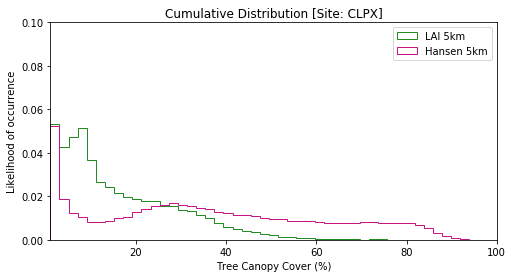

In [63]:
# make a figure
fig, ax = plt.subplots(figsize=(8, 4))

# plot the cumulative histogram
ax.hist(flattened_raster_data4, density=True, cumulative=False, label='LAI 5km',
        bins=np.linspace(1, 100, 50),
         histtype='step', color='forestgreen')

# plot the cumulative histogram
ax.hist(flattened_raster_data5, density=True, cumulative=False, label='Hansen 5km',
           bins=np.linspace(1, 100, 50),
         histtype='step', color='mediumvioletred')


ax.grid(False)
ax.legend(loc='upper right')
ax.set_title('Cumulative Distribution [Site: CLPX]')
ax.set_xlabel('Tree Canopy Cover (%)')
ax.set_ylabel('Likelihood of occurrence')
plt.xlim(xmin=1, xmax = 100)
plt.ylim(ymin=0, ymax = 0.10)

plt.show()

(0, 0.1)

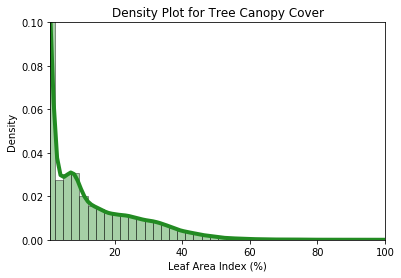

In [57]:
# Density Plot and Histogram
sns.distplot(flattened_raster_data4, hist=True, kde=True, 
             bins=np.linspace(1, 100, 50), color = 'forestgreen', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

# Plot formatting
# plt.legend(prop={'size': 16}, title = 'Airline')
plt.title('Density Plot for Tree Canopy Cover')
plt.xlabel('Leaf Area Index (%)')
plt.ylabel('Density')
plt.xlim(xmin=1, xmax = 100)
plt.ylim(ymin=0, ymax = 0.10)

In [72]:
test = flattened_raster_data5.astype(float)
type(flattened_raster_data5)
type(flattened_raster_data4)

numpy.ndarray

(1, 100)

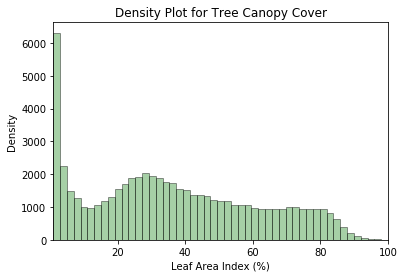

In [80]:


# Density Plot and Histogram
sns.distplot(flattened_raster_data5, hist=True, kde=False, 
             bins=np.linspace(1, 100, 50), color = 'forestgreen', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

# Plot formatting
# plt.legend(prop={'size': 16}, title = 'Airline')
plt.title('Density Plot for Tree Canopy Cover')
plt.xlabel('Leaf Area Index (%)')
plt.ylabel('Density')
plt.xlim(xmin=1, xmax = 100)
# plt.ylim(ymin=0, ymax = 0.10)